JSON

In [1]:
import json
import os
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

class Config:
    def __init__(self, results_file='rs/original/results.json'):
        self.results_file = results_file


    def load_results(self):
        if not os.path.exists(self.results_file):
            raise FileNotFoundError(f"{self.results_file} not found")
        with open(self.results_file, 'r') as f:
            results = json.load(f)
        print(f"Loaded {len(results)} samples from {self.results_file}")
        return results

# Initialize configuration
config = Config()
results = config.load_results()

Loaded 9906 samples from rs/original/results.json


Loaded 8 samples from results.json
Accuracy: 0.1250
Precision: 0.2500
Recall: 0.1250
F1 Score: 0.1667


/home/z/miniconda3/envs/mmxai/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/z/miniconda3/envs/mmxai/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


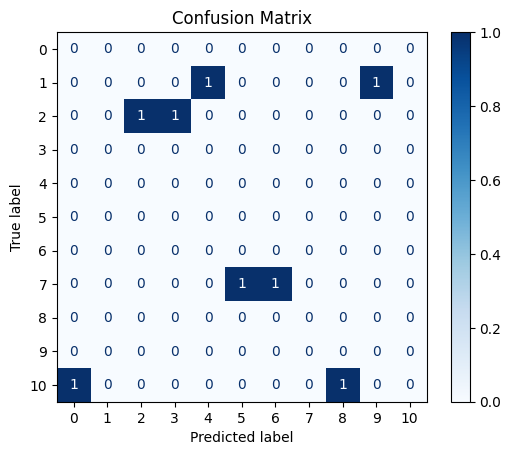

Mean Shapley Value (True Label): 0.0016, Variance: 0.0024
Mean Shapley Value (Predicted Label): 0.0070, Variance: 0.0103


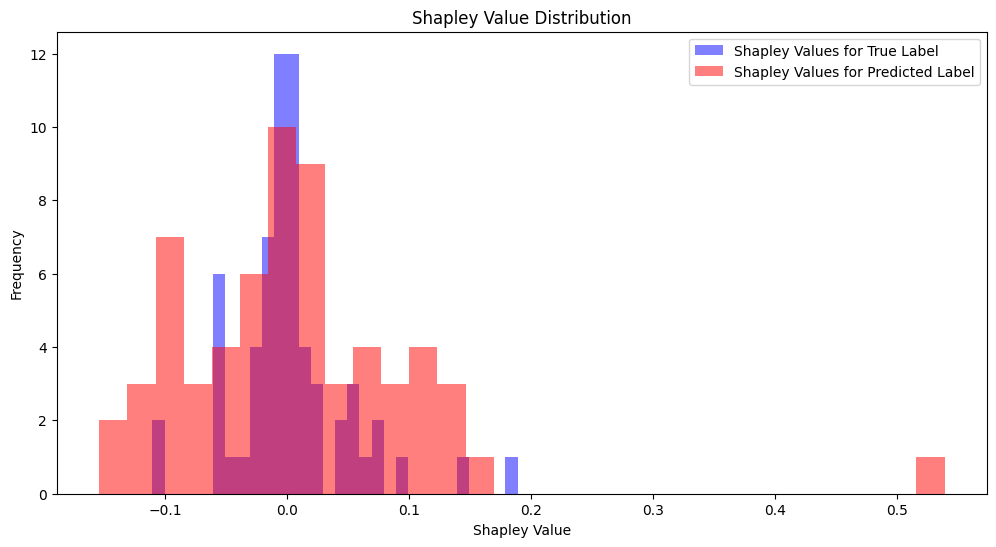

Correlation between Shapley Values and Accuracy: -0.0051
Mean Processing Time: 0.0000 seconds
Mean CPU Energy Consumption: 0.0000 J
Mean GPU Energy Consumption: 0.0000 J


In [5]:
import json
import os
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from scipy import stats

class Config:
    def __init__(self, results_file='results.json'):
        self.results_file = results_file

    def load_results(self):
        if not os.path.exists(self.results_file):
            raise FileNotFoundError(f"{self.results_file} not found")
        with open(self.results_file, 'r') as f:
            results = json.load(f)
        print(f"Loaded {len(results)} samples from {self.results_file}")
        return results

# Initialize configuration
config = Config()
results = config.load_results()

# 计算分类性能指标
def compute_classification_metrics(results):
    true_labels = [result['video_true_label'] for result in results]
    pred_labels = [result['video_pred_label'] for result in results]
    
    accuracy = accuracy_score(true_labels, pred_labels)
    precision = precision_score(true_labels, pred_labels, average='weighted')
    recall = recall_score(true_labels, pred_labels, average='weighted')
    f1 = f1_score(true_labels, pred_labels, average='weighted')
    
    return accuracy, precision, recall, f1

# 绘制混淆矩阵
def plot_confusion_matrix(results):
    true_labels = [result['video_true_label'] for result in results]
    pred_labels = [result['video_pred_label'] for result in results]
    
    cm = confusion_matrix(true_labels, pred_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

# 计算Shapley值的统计信息
def compute_shapley_statistics(results):
    shapley_values_true = []
    shapley_values_pred = []

    for result in results:
        for segment in result['segments']:
            shapley_values_true.append(segment['sv_true_label'])
            shapley_values_pred.append(segment['sv_video_pred'])

    mean_true = np.mean(shapley_values_true)
    mean_pred = np.mean(shapley_values_pred)
    var_true = np.var(shapley_values_true)
    var_pred = np.var(shapley_values_pred)
    
    return mean_true, mean_pred, var_true, var_pred

# 绘制Shapley值分布图
def plot_shapley_value_distribution(results):
    shapley_values_true = []
    shapley_values_pred = []

    for result in results:
        for segment in result['segments']:
            shapley_values_true.append(segment['sv_true_label'])
            shapley_values_pred.append(segment['sv_video_pred'])

    plt.figure(figsize=(12, 6))
    plt.hist(shapley_values_true, bins=30, alpha=0.5, label='Shapley Values for True Label', color='blue')
    plt.hist(shapley_values_pred, bins=30, alpha=0.5, label='Shapley Values for Predicted Label', color='red')
    plt.xlabel('Shapley Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.title('Shapley Value Distribution')
    plt.show()

# 计算Shapley值和分类准确率的相关性
def compute_shapley_accuracy_correlation(results):
    shapley_values = []
    accuracies = []

    for result in results:
        for segment in result['segments']:
            shapley_values.append(segment['sv_true_label'])
            accuracies.append(1 if result['video_true_label'] == result['video_pred_label'] else 0)
    
    correlation = np.corrcoef(shapley_values, accuracies)[0, 1]
    return correlation

# 计算时间和能耗
def compute_time_energy_metrics(results):
    times = [result.get('time_consumed', 0) for result in results]
    cpu_energies = [result.get('cpu_energy', 0) for result in results]
    gpu_energies = [result.get('gpu_energy', 0) for result in results]
    
    mean_time = np.mean(times)
    mean_cpu_energy = np.mean(cpu_energies)
    mean_gpu_energy = np.mean(gpu_energies)
    
    return mean_time, mean_cpu_energy, mean_gpu_energy

# 运行统计分析和绘图
accuracy, precision, recall, f1 = compute_classification_metrics(results)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

plot_confusion_matrix(results)

mean_true, mean_pred, var_true, var_pred = compute_shapley_statistics(results)
print(f"Mean Shapley Value (True Label): {mean_true:.4f}, Variance: {var_true:.4f}")
print(f"Mean Shapley Value (Predicted Label): {mean_pred:.4f}, Variance: {var_pred:.4f}")

plot_shapley_value_distribution(results)

correlation = compute_shapley_accuracy_correlation(results)
print(f"Correlation between Shapley Values and Accuracy: {correlation:.4f}")

mean_time, mean_cpu_energy, mean_gpu_energy = compute_time_energy_metrics(results)
print(f"Mean Processing Time: {mean_time:.4f} seconds")
print(f"Mean CPU Energy Consumption: {mean_cpu_energy:.4f} J")
print(f"Mean GPU Energy Consumption: {mean_gpu_energy:.4f} J")


In [6]:
import numpy as np
from scipy.stats import pearsonr

def compute_shapley_accuracy_correlation(results):
    shapley_values = []
    accuracies = []

    for result in results:
        for segment in result['segments']:
            shapley_values.append(segment['sv_true_label'])
            accuracies.append(1 if result['video_true_label'] == result['video_pred_label'] else 0)
    
    correlation, p_value = pearsonr(shapley_values, accuracies)
    return correlation, p_value

# 运行统计分析
results = config.load_results()

correlation, p_value = compute_shapley_accuracy_correlation(results)
print(f"Correlation between Shapley Values and Accuracy: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")


Loaded 8 samples from results.json
Correlation between Shapley Values and Accuracy: -0.0051
P-value: 0.9680


Loaded 8 samples from results.json
Accuracy: 0.1250
Precision: 0.2500
Recall: 0.1250
F1 Score: 0.1667


/home/z/miniconda3/envs/mmxai/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/z/miniconda3/envs/mmxai/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


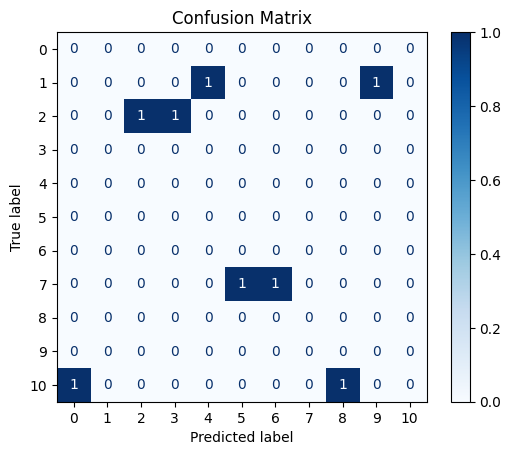

Correlation between Shapley Values and Segment Accuracy: 0.5950
P-value: 0.0000


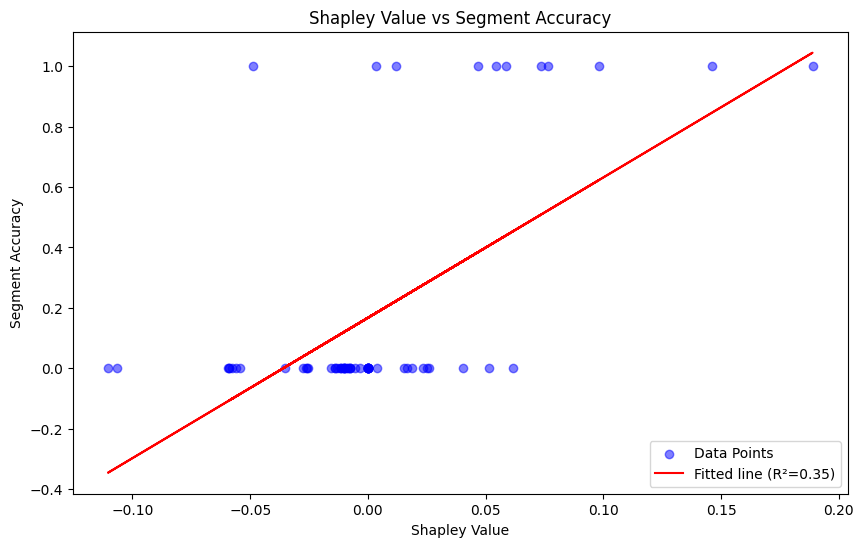

In [7]:
import json
import os
import av
import torch
import numpy as np
from transformers import AutoImageProcessor, TimesformerForVideoClassification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

# 初始化视频处理器
video_processor = VideoProcessor(config["model_name"], config["image_processor_name"])
model = video_processor.model

# 加载结果文件
with open("results.json", "r") as file:
    results = json.load(file)

# 准备用于存储新预测结果的变量
true_labels = []
original_preds = []
modified_preds = []
score_differences = []
evaluation_results = []

# 创建临时目录
temp_directory = os.path.join(config["video_directory"], "temp")
os.makedirs(temp_directory, exist_ok=True)

# 使用tqdm创建进度条
for result in tqdm(results, desc="Processing videos"):
    video_file = result['video_file']
    segments = result['segments']
    true_label = result['video_true_label']

    # 选择SV值最高的Top-n个segments进行移除
    top_n = 1
    segments_to_remove = sorted(segments, key=lambda x: x['sv_true_label'], reverse=True)[:top_n]
    remove_indices = {seg['segment_index'] for seg in segments_to_remove}

    # 重新加载视频并提取帧
    file_path = os.path.join(config["video_directory"], video_file)
    container = av.open(file_path)
    frames = [frame.to_image() for frame in container.decode(video=0)]
    fps = container.streams.video[0].average_rate
    segment_duration = 1
    segment_length = int(fps * segment_duration)
    total_frames = len(frames)
    new_frames = [frames[i] for i in range(total_frames) if (i // segment_length + 1) not in remove_indices]

    # 确保仍有帧可用于创建新视频
    if not new_frames:
        print(f"All segments removed for {video_file}, skipping video.")
        continue

    # 在指定临时目录下保存处理后的视频
    output_path = os.path.join(temp_directory, f"modified_{os.path.basename(video_file)}")
    new_container = av.open(output_path, mode='w')
    stream = new_container.add_stream('mpeg4', rate=fps)
    for frame in new_frames:
        frame = av.VideoFrame.from_image(frame)
        packet = stream.encode(frame)
        new_container.mux(packet)
    new_container.close()

    # 使用修改后的视频文件进行预测
    new_container = av.open(output_path)
    segment_outputs = video_processor.predict_video_and_segments(new_container, true_label)
    video_probs = torch.mean(torch.stack([output[2] for output in segment_outputs]), dim=0)
    modified_pred_label = video_probs.argmax().item()
    modified_pred_score = video_probs[0, modified_pred_label].item()
    modified_true_label_score = video_probs[0, true_label].item()

    original_true_label_score = result['video_true_score']
    score_difference = original_true_label_score - modified_true_label_score
    score_differences.append(score_difference)

    # 记录新旧预测结果
    true_labels.append(true_label)
    original_preds.append(result['video_pred_label'])
    modified_preds.append(modified_pred_label)

    evaluation_results.append({
        "video_file": video_file,
        "original_prediction": result['video_pred_label'],
        "original_score": result['video_pred_score'],
        "original_true_label_score": original_true_label_score,
        "modified_prediction": modified_pred_label,
        "modified_score": modified_pred_score,
        "modified_true_label_score": modified_true_label_score,
        "true_label": true_label,
        "score_difference": score_difference
    })

# 计算性能指标
accuracy = accuracy_score(true_labels, modified_preds)
precision = precision_score(true_labels, modified_preds, average='weighted')
recall = recall_score(true_labels, modified_preds, average='weighted')
f1 = f1_score(true_labels, modified_preds, average='weighted')
median_score_difference = np.median(score_differences)

# 性能结果保存到evaluation.json
evaluation_summary = {
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1_score": f1,
    "median_score_difference": median_score_difference,
    "evaluation_details": evaluation_results
}

with open("evaluation.json", "w") as f:
    json.dump(evaluation_summary, f, indent=4)


/tmp/ipykernel_1707376/3866233418.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(x="Condition", y="Score Difference", data=df, palette=palette, inner=None)


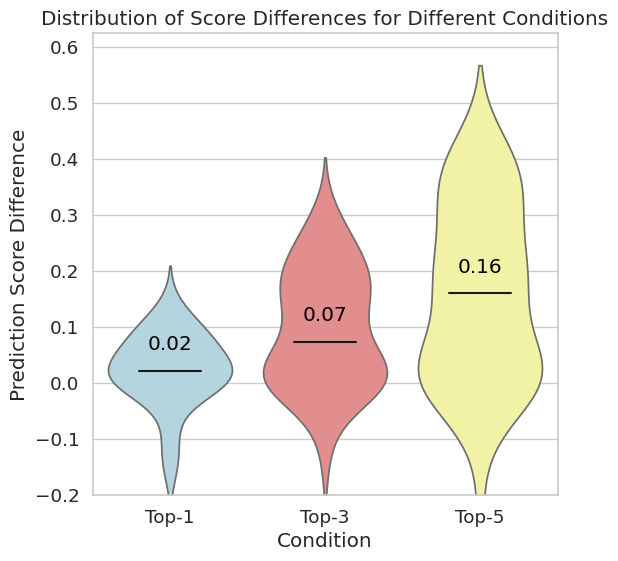

In [11]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 设置图表风格，保留默认的白背景和边框
sns.set(style="whitegrid", font_scale=1.2)

# 文件路径和标签
file_paths = ["evaluation1.json", "evaluation3.json", "evaluation5.json"]
labels = ["Top-1", "Top-3", "Top-5"]

# 初始化空的DataFrame
df = pd.DataFrame()

# 读取数据并将其添加到DataFrame
for file_path, label in zip(file_paths, labels):
    with open(file_path, "r") as file:
        data = json.load(file)
    score_differences = [item["score_difference"] for item in data["evaluation_details"]]
    temp_df = pd.DataFrame(score_differences, columns=["Score Difference"])
    temp_df["Condition"] = label
    df = pd.concat([df, temp_df], ignore_index=True)

# 定义浅色调的调色板
palette = {"Top-1": "#add8e6", "Top-3": "#f08080", "Top-5": "#ffff99"}

# 绘制violin plot
plt.figure(figsize=(6, 6))  # 设置图形尺寸为1:1
violin = sns.violinplot(x="Condition", y="Score Difference", data=df, palette=palette, inner=None)

# 计算并画出每个条件的中位数
medians = df.groupby(['Condition'])['Score Difference'].median()
for pos, median in enumerate(medians):
    plt.axhline(y=median, color='k', linestyle='-', linewidth=1.5, xmax=(pos + 1.0)/len(medians) - 0.1, xmin=pos/len(medians) + 0.1)
    # 添加中位数值标注
    plt.text(x=pos, y=median + 0.03, s=f'{median:.2f}', color='black', ha='center', va='bottom')

plt.title('Distribution of Score Differences for Different Conditions')
plt.xlabel('Condition')
plt.ylabel('Prediction Score Difference')

# 设置y轴的显示范围
plt.ylim(-0.2, df['Score Difference'].max() + 0.2)  # 设置y轴下限为-0.2，上限留一些余量

# 显示图形
plt.show()
